<a href="https://colab.research.google.com/github/Sapphirevic/Classifications/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Image classification

## Imports


In [1]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # In order to plot the images to see what we are dealing with
from sklearn.ensemble import RandomForestClassifier # You'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report


# The data

In [2]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Extracting the data


In [18]:
def get_data(num_train_images, num_test_images):
    IMAGE_WIDTH = 28  # Size of each image (28x28)

    # File paths for MNIST dataset
    train_images_path = 'train-images-idx3-ubyte.gz'
    train_labels_path = 'train-labels-idx1-ubyte.gz'
    test_images_path = 't10k-images-idx3-ubyte.gz'
    test_labels_path = 't10k-labels-idx1-ubyte.gz'

    # Extract training data
    X_train = extract_data(train_images_path, num_train_images, IMAGE_WIDTH)
    y_train = extract_labels(train_labels_path, num_train_images)

    # Extract testing data
    X_test = extract_data(test_images_path, num_test_images, IMAGE_WIDTH)
    y_test = extract_labels(test_labels_path, num_test_images)

    # Normalize image data to range [0, 1]
    X_train /= 255.0
    X_test /= 255.0

    return (X_train, y_train), (X_test, y_test)

# Extract 5000 train images and 1000 test images
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)

In [20]:
print(y_test[50])


6


## Plotting the data

Label:  1


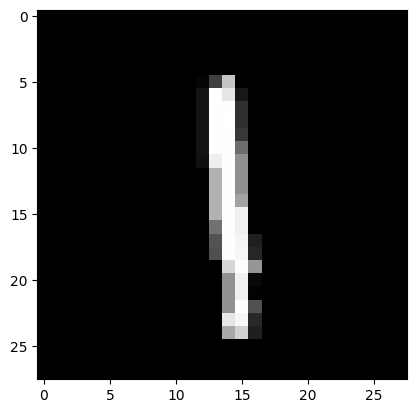

In [9]:
image_index = 8 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

## Training the model

In [10]:
def train_model(X_train, y_train):
    """
    Trains a RandomForestClassifier on the given data.

    Parameters:
        X_train (numpy array): Training data (features).
        y_train (numpy array): Training labels.

    Returns:
        model: Trained RandomForestClassifier model.
    """
    # Create the RandomForestClassifier with specified parameters
    model = RandomForestClassifier(n_estimators=20, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    return model

# Train the model using the data we previously extracted
model = train_model(X_train, y_train)

# Print a confirmation message
print("Model trained successfully.")

Model trained successfully.


In [11]:
clf = train_model(X_train, y_train)

## Testing the model


In [13]:
def calculate_accuracy(clf, X_test, y_test):
    """
    Calculates the accuracy of the trained model on the test data.

    Parameters:
        clf: Trained RandomForestClassifier model.
        X_test (numpy array): Test data (features).
        y_test (numpy array): Test labels.

    Returns:
        float: Accuracy of the model on the test set (value between 0 and 1).
    """
    # Use the model's score method to calculate accuracy
    accuracy = clf.score(X_test, y_test)
    return accuracy

# Calculate and print the accuracy of the trained model
#accuracy = calculate_accuracy(clf, X_test, y_test)
#print(f"Model Accuracy on Test Set: {accuracy:.2f}")

In [14]:
print(calculate_accuracy(clf,X_test,y_test))

0.891


In [15]:
def get_class_report(clf, X_test, y_test):
    """
    Generates a classification report for the given test data.

    Parameters:
        clf: Trained RandomForestClassifier model.
        X_test (numpy array): Test data (features).
        y_test (numpy array): Test labels.

    Returns:
        str: Classification report as a string.
    """
    # Get the predicted labels for the test set
    y_pred = clf.predict(X_test)

    # Generate the classification report
    report = classification_report(y_test, y_pred)
    return report

In [16]:
print(get_class_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



## Plotting the results


Predicted Label:  7


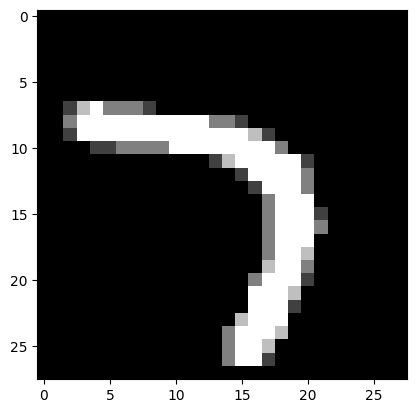

In [22]:
preds = clf.predict(X_test)

image_index = 60
 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()